In [5]:
from lvmtipo.actors import lvm
from cluplus.proxy import invoke

from lvmagp.images import Image
from plotimg import plot_images

In [6]:
await invoke(lvm.sci.agc.start(), lvm.skyw.agc.start(), lvm.skye.agc.start(), lvm.spec.agc.start())
await invoke(lvm.sci.agc.status(), lvm.skyw.agc.status(), lvm.skye.agc.status(), lvm.spec.agc.status())


[{'east': {'temperature': 49.125,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'},
  'center': {'state': 'online'},
  'west': {'state': 'online'}},
 {'east': {'temperature': 47.125,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'},
  'west': {'temperature': 47.875,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'}},
 {'east': {'temperature': 48.25,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'},
  'west': {'temperature': 45.25,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'}},
 {'east': {'state': 'online'}}]

In [15]:
exptime = 0.1

In [10]:
await lvm.sci.agc.reconnect()

{'east': {'state': 'online'},
 'center': {'state': 'online'},
 'west': {'state': 'online'}}

['/data/lvm/sci/agcam/east/20230221/lvm.sci.agcam.east_00000352.fits', '/data/lvm/sci/agcam/center/20230221/lvm.sci.agcam.center_00000352.fits', '/data/lvm/sci/agcam/west/20230221/lvm.sci.agcam.west_00000351.fits']


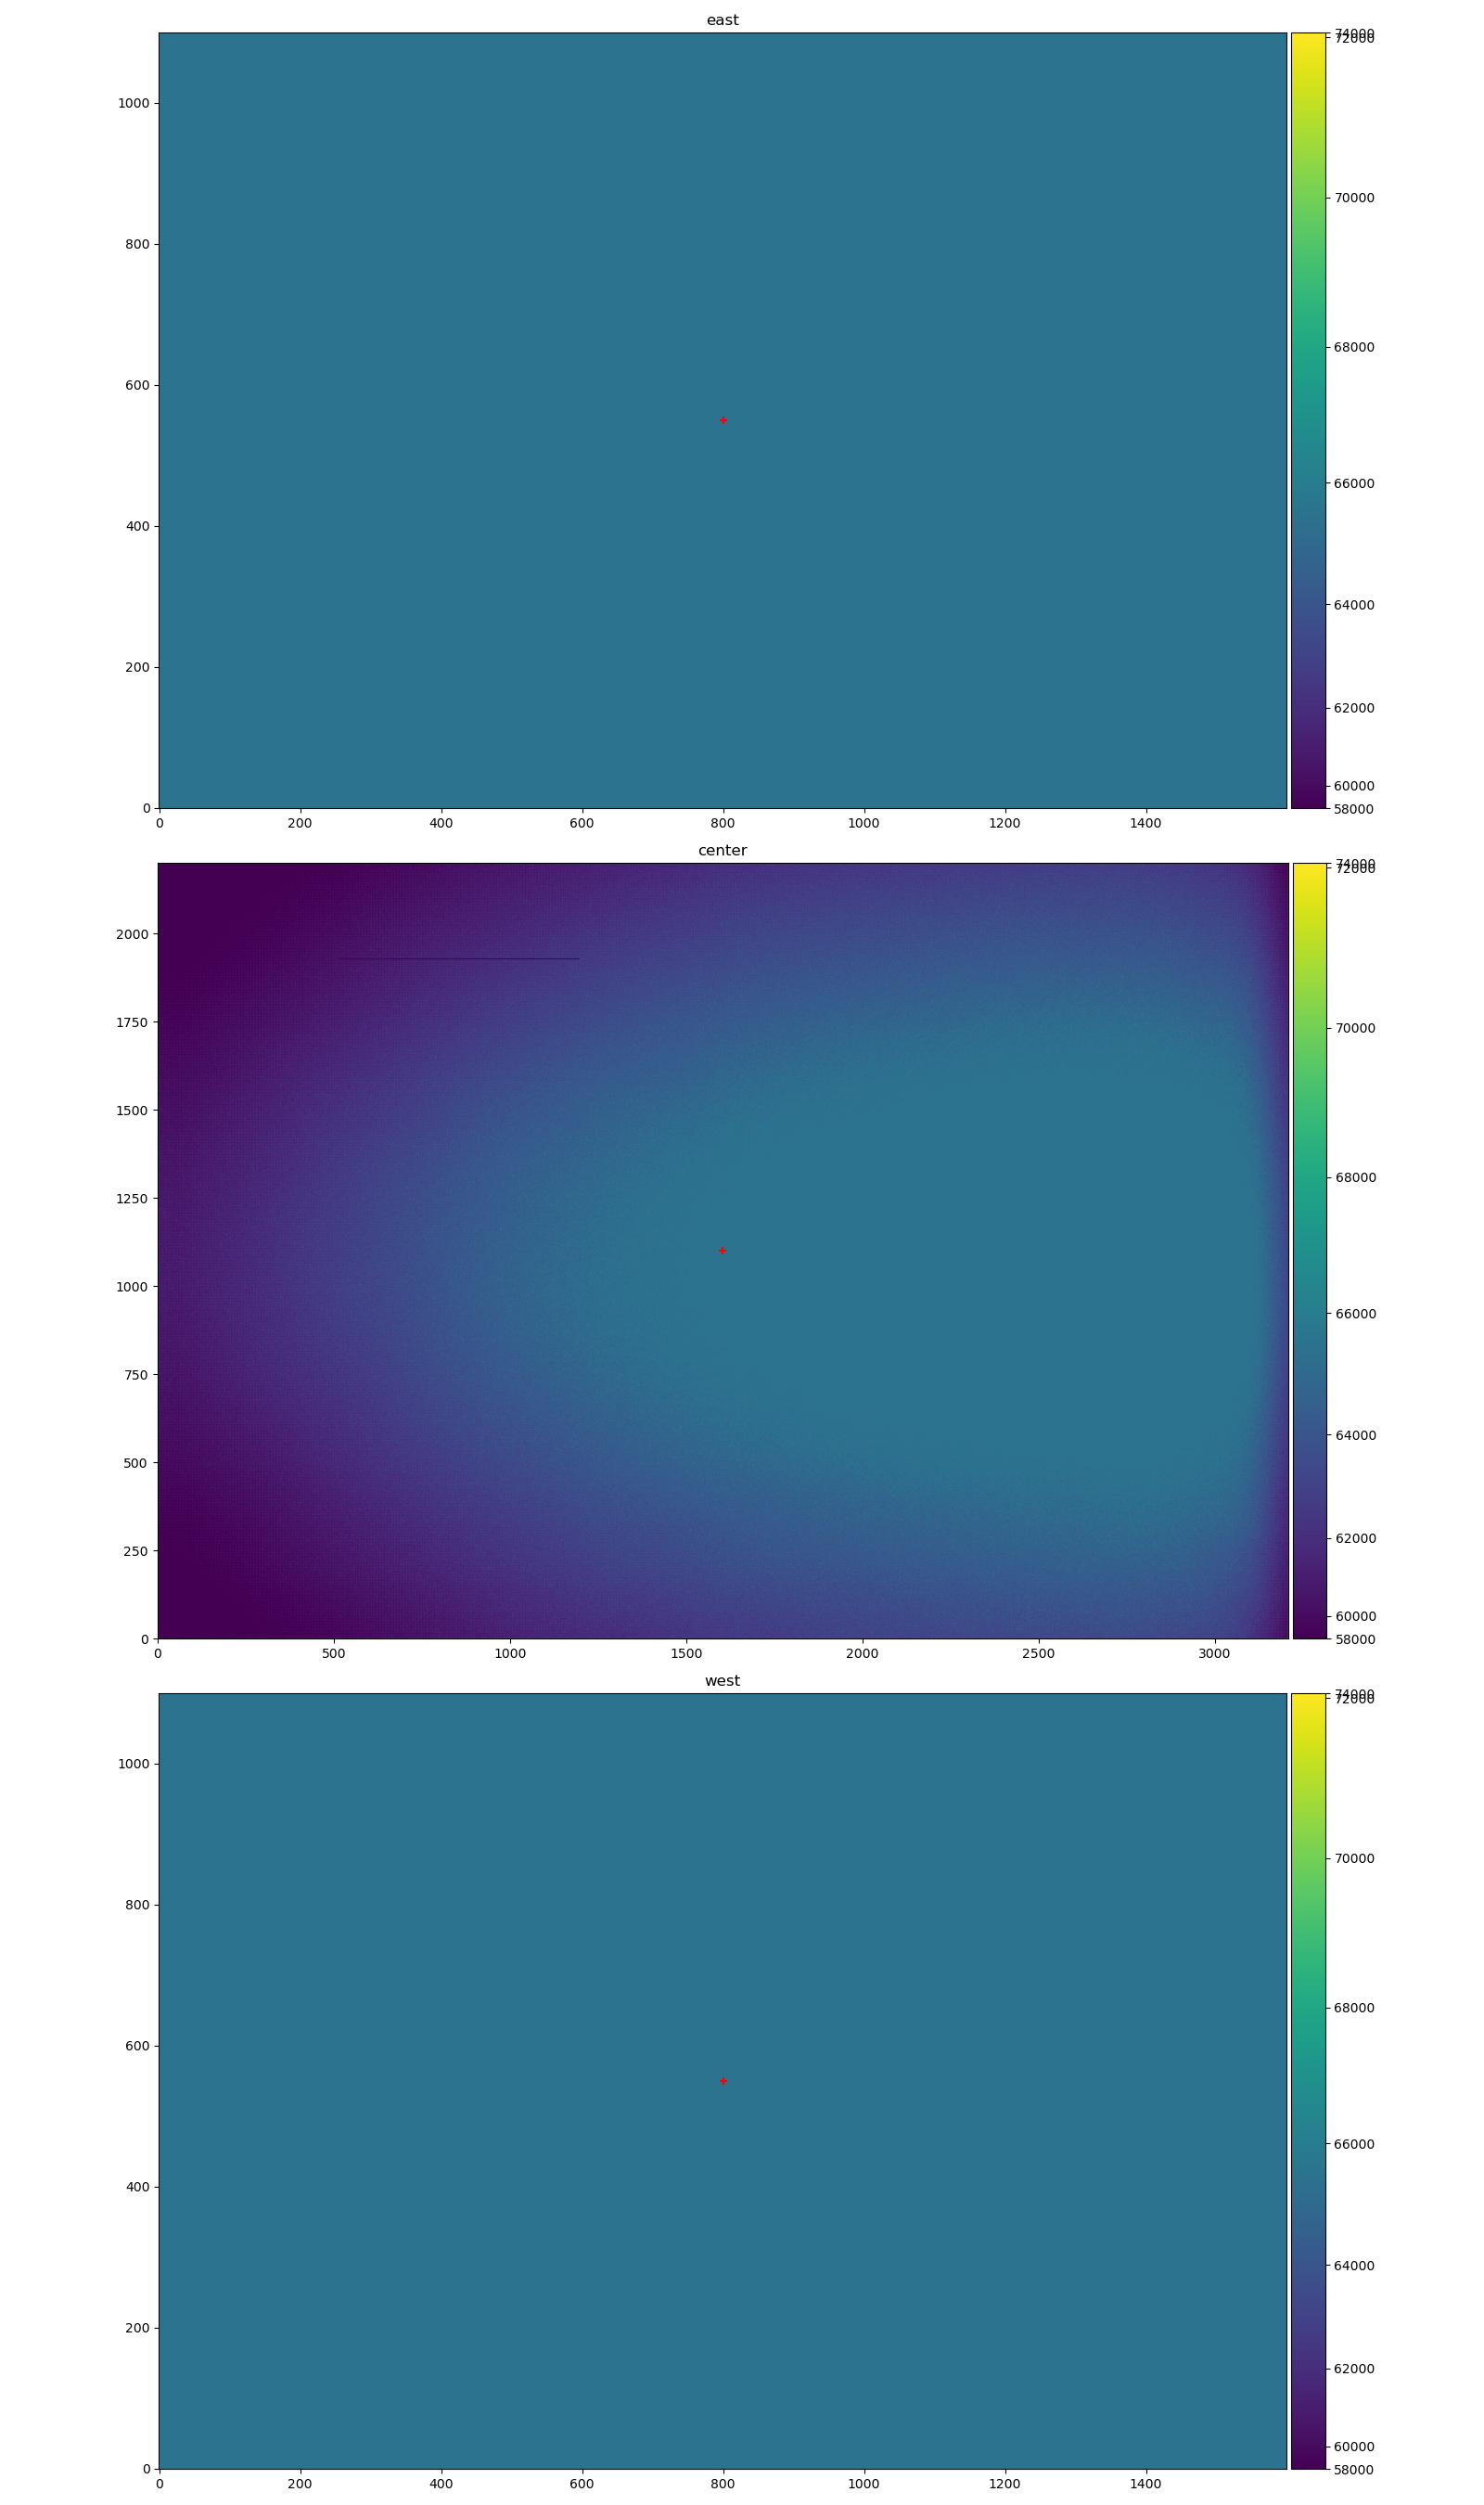

In [21]:
%matplotlib widget

rc = await lvm.sci.agc.expose( exptime )
filenames = rc.flatten().unpack("*.filename")
print(filenames)
images = [Image.from_file(f) for f in filenames]
plot_images(images)



In [24]:
await lvm.skyw.agc.reconnect()

{'east': {'state': 'online'}, 'west': {'state': 'online'}}

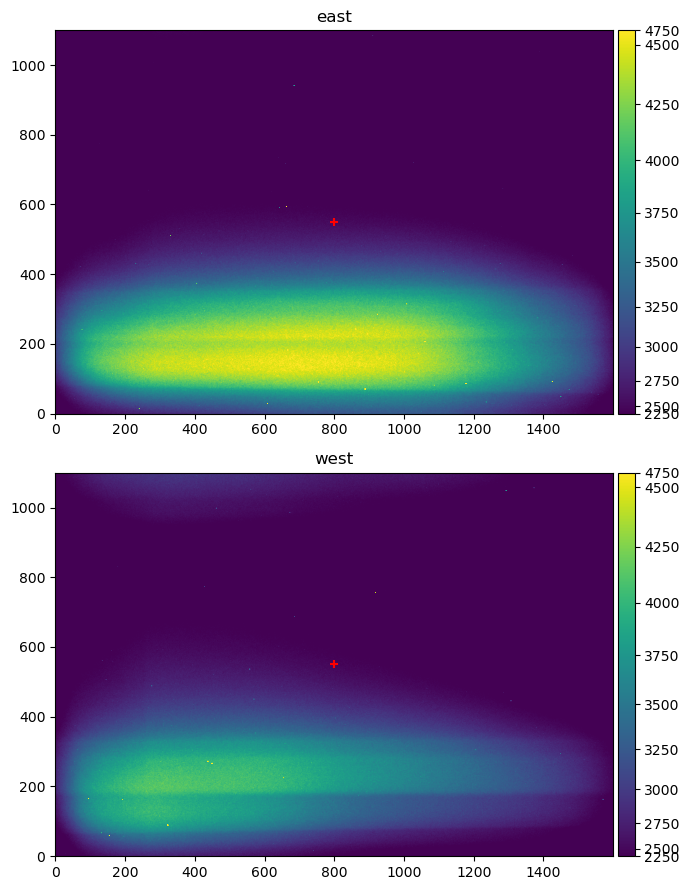

In [25]:
rc = await lvm.skyw.agc.expose( exptime)
filenames = rc.flatten().unpack("*.filename")
images = [Image.from_file(f) for f in filenames]
plot_images(images)


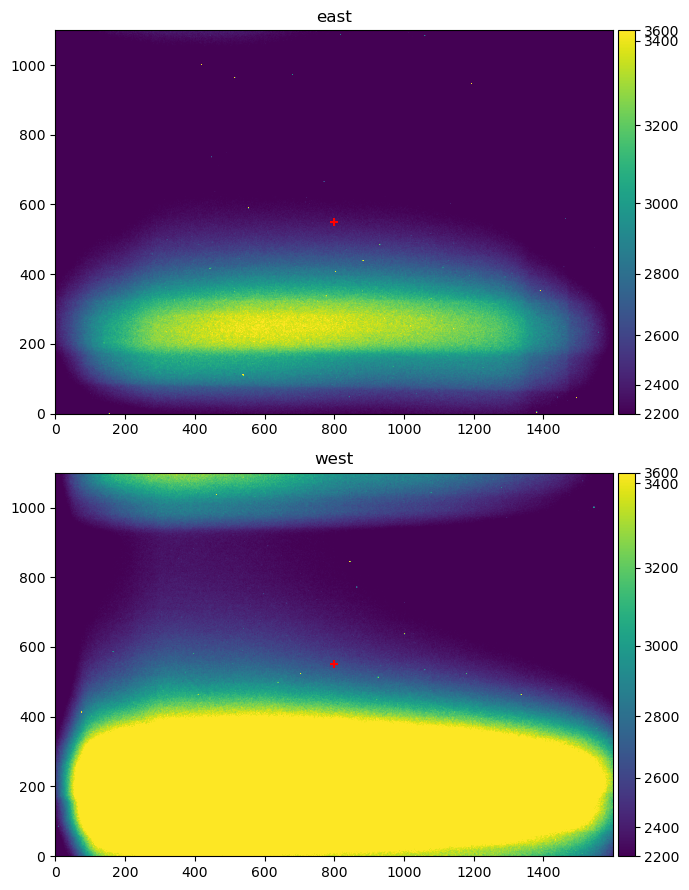

In [26]:
rc = await lvm.skye.agc.expose( exptime)
filenames = rc.flatten().unpack("*.filename")
images = [Image.from_file(f) for f in filenames]
plot_images(images)


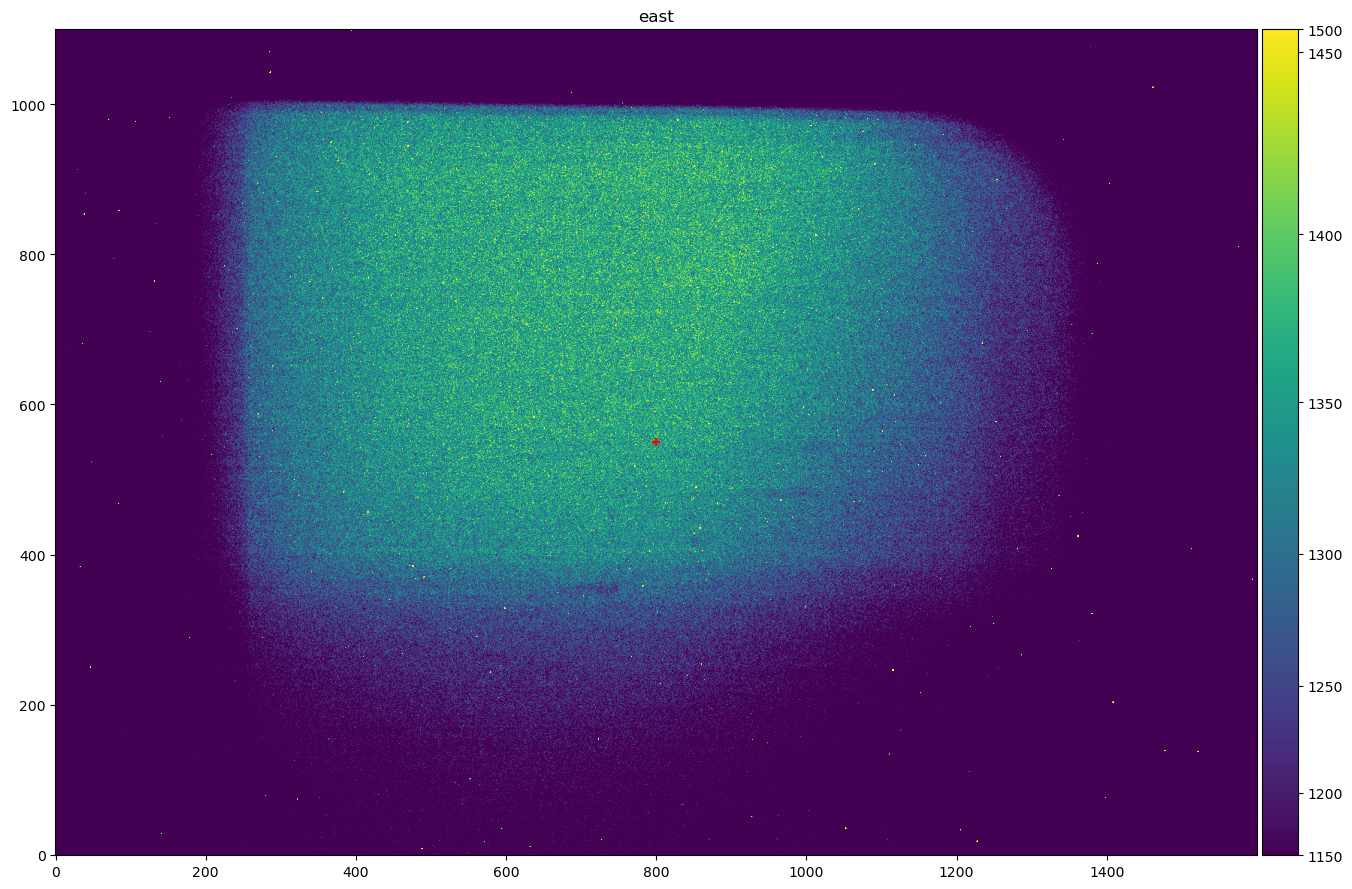

In [27]:
rc = await lvm.spec.agc.expose( exptime)
filename = rc.flatten().unpack("*.filename")
images = [Image.from_file(f) for f in [filename]]
plot_images(images)